# 2017년 화재 곽성화

In [77]:
# 모듈 로딩 --------------------------------
import pandas as pd

# 파일 관련 변수들 ---------------------------
DIR_PATH='../Data/'
FILE_NAME=DIR_PATH+'fire_allyear.csv'

FILE_NAME

'../Data/fire_allyear.csv'

In [78]:
# CSV File => DataFrame으로 객체 생성
fireDF=pd.read_csv(FILE_NAME, encoding='cp949')

fireDF.head(3)                     # 일부 데이터 확인

,년,월,시간대,시도,화재유형,발화열원대분류,발화요인대분류,최초착화물대분류,장소대분류,사망,부상,인명피해(명)소계,재산피해소계
0,2015,1,심야,경상남도,"건축,구조물",작동기기,전기적 요인,"전기,전자",주거,0,0,0,2920
1,2015,1,심야,서울특별시,임야,"담뱃불, 라이터불",부주의,기타,임야,0,0,0,0
2,2015,1,심야,서울특별시,"자동차,철도차량","담뱃불, 라이터불",부주의,"침구,직물류","자동차,철도차량",0,0,0,137


In [79]:
# DF 요약 정보 확인
fireDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214467 entries, 0 to 214466
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   년          214467 non-null  int64 
 1   월          214467 non-null  int64 
 2   시간대        214467 non-null  object
 3   시도         214467 non-null  object
 4   화재유형       214467 non-null  object
 5   발화열원대분류    214467 non-null  object
 6   발화요인대분류    214467 non-null  object
 7   최초착화물대분류   214467 non-null  object
 8   장소대분류      214467 non-null  object
 9   사망         214467 non-null  int64 
 10  부상         214467 non-null  int64 
 11  인명피해(명)소계  214467 non-null  int64 
 12  재산피해소계     214467 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 21.3+ MB


In [80]:
# 컬럼 이름 변경
fireDF=fireDF.rename( columns={'발화열원대분류':'발화열원',
                          '발화요인대분류':'발화요인', 
                          '최초착화물대분류':'최초착화물', 
                          '장소대분류':'장소', 
                          '인명피해(명)소계':'인명피해'}, inplace=False)

In [81]:
# 카테고리 자료형으로 변환 (용량/속도면에서 효율적)
fireDF['년']=fireDF['년'].astype('category')
fireDF['월']=fireDF['월'].astype('category')
fireDF['시간대']=fireDF['시간대'].astype('category')
fireDF['시도']=fireDF['시도'].astype('category')
fireDF['화재유형']=fireDF['화재유형'].astype('category')
fireDF['발화열원']=fireDF['발화열원'].astype('category')
fireDF['발화요인']=fireDF['발화요인'].astype('category')
fireDF['최초착화물']=fireDF['최초착화물'].astype('category')
fireDF['장소']=fireDF['장소'].astype('category')

fireDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214467 entries, 0 to 214466
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   년       214467 non-null  category
 1   월       214467 non-null  category
 2   시간대     214467 non-null  category
 3   시도      214467 non-null  category
 4   화재유형    214467 non-null  category
 5   발화열원    214467 non-null  category
 6   발화요인    214467 non-null  category
 7   최초착화물   214467 non-null  category
 8   장소      214467 non-null  category
 9   사망      214467 non-null  int64   
 10  부상      214467 non-null  int64   
 11  인명피해    214467 non-null  int64   
 12  재산피해소계  214467 non-null  int64   
dtypes: category(9), int64(4)
memory usage: 8.4 MB


### (1) 전체 자료 중 2017년 데이터만 추출하기 -----------------------

In [82]:
# 자료 중 년도 data 확인
fireDF['년'].values

[2015, 2015, 2015, 2015, 2015, ..., 2019, 2019, 2019, 2019, 2019]
Length: 214467
Categories (5, int64): [2015, 2016, 2017, 2018, 2019]

In [83]:
# 년도가 2017년인 자료 선택
fire_year17 = fireDF['년']==2017
fire_year17

0         False
1         False
2         False
3         False
4         False
          ...  
214462    False
214463    False
214464    False
214465    False
214466    False
Name: 년, Length: 214467, dtype: bool

In [84]:
# 선택한 2017년 자료로 전체 데이터에서 추출
fire2017 = fireDF[fire_year17]
fire2017.head(3)

,년,월,시간대,시도,화재유형,발화열원,발화요인,최초착화물,장소,사망,부상,인명피해,재산피해소계
87848,2017,1,심야,서울특별시,"건축,구조물",작동기기,전기적 요인,"전기,전자",주거,0,0,0,13391
87849,2017,1,심야,경상북도,"건축,구조물",작동기기,전기적 요인,합성수지,생활서비스,0,0,0,195
87850,2017,1,심야,경상남도,기타(쓰레기 화재등),"불꽃, 불티",부주의,"종이,목재,건초등",기타,0,0,0,22


In [85]:
# 2017년 DF 속성 읽기
fire2017.shape                  # 형태(행렬 갯수) 파악

(44178, 13)

In [86]:
fire2017.columns                # 컬럼 정보 확인

Index(['년', '월', '시간대', '시도', '화재유형', '발화열원', '발화요인', '최초착화물', '장소', '사망',
       '부상', '인명피해', '재산피해소계'],
      dtype='object')

In [87]:
fire2017.index                  # 행 인덱스 확인

Int64Index([ 87848,  87849,  87850,  87851,  87852,  87853,  87854,  87855,
             87856,  87857,
            ...
            132016, 132017, 132018, 132019, 132020, 132021, 132022, 132023,
            132024, 132025],
           dtype='int64', length=44178)

In [88]:
print(f'자료 갯수 : {fire2017.index[-1] - fire2017.index[0] + 1}')

자료 갯수 : 44178


In [89]:
fire2017.info()                 # 요약 정보 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44178 entries, 87848 to 132025
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   년       44178 non-null  category
 1   월       44178 non-null  category
 2   시간대     44178 non-null  category
 3   시도      44178 non-null  category
 4   화재유형    44178 non-null  category
 5   발화열원    44178 non-null  category
 6   발화요인    44178 non-null  category
 7   최초착화물   44178 non-null  category
 8   장소      44178 non-null  category
 9   사망      44178 non-null  int64   
 10  부상      44178 non-null  int64   
 11  인명피해    44178 non-null  int64   
 12  재산피해소계  44178 non-null  int64   
dtypes: category(9), int64(4)
memory usage: 2.1 MB


### (2) 2017년 항목별 화재 분석 ------------------------------- 

In [90]:
# 데이터 시각화를 위해 패키지 설치 ------------------------
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [91]:
# 모듈 로딩 -----------------------------
import matplotlib.pyplot as plt

In [92]:
# Matplotlib 한글 Font 설정 ---------------
from matplotlib import font_manager as fm, rc

# 한글 폰트 설정
font_path='../Fonts/malgun.ttf'
font_name=fm.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

In [93]:
# 시도별 화재발생 비교
f2017__1=fire2017.groupby('시도').count()['년'].sort_values(ascending=False)
f2017__1.head(3)

시도
경기도      9799
서울특별시    5978
경상남도     4117
Name: 년, dtype: int64

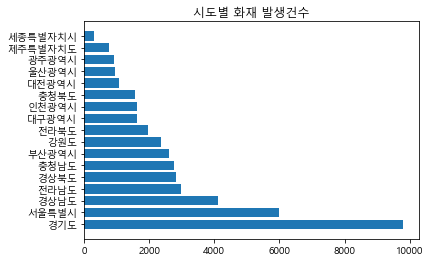

In [94]:
# 시도별 화재발생 비교 그래프
x = f2017__1.index
y = f2017__1.values

plt.barh(x,y)
plt.title('시도별 화재 발생건수')
plt.show()

In [95]:
# 월 컬럼 values 변경
fire2017=fire2017.replace({'월':{1:'1월',2:'2월',3:'3월',4:'4월',5:'5월',6:'6월',7:'7월',8:'8월',9:'9월',10:'10월',11:'11월',12:'12월'}})

In [96]:
# 월별 화재발생 비교
f2017__2=fire2017.groupby('월').count()['년'].sort_values(ascending=False)
f2017__2.head(3)

월
3월     5385
5월     4229
12월    4086
Name: 년, dtype: int64

In [97]:
f2017__22=fire2017.groupby('월').count()['년']

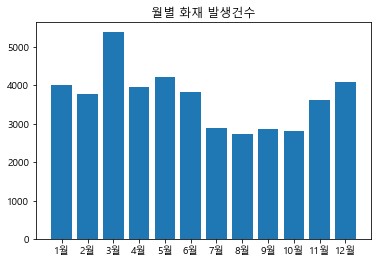

In [98]:
# 월별 화재발생 비교 그래프
x = f2017__22.index
y = f2017__22.values

plt.bar(x,y)
plt.title('월별 화재 발생건수')
plt.show()

In [99]:
# 시간대별 화재발생 비교
f2017__3=fire2017.groupby('시간대').count()['년'].sort_values(ascending=False)
f2017__3

시간대
낮     16926
저녁    10918
아침    10396
심야     5938
Name: 년, dtype: int64

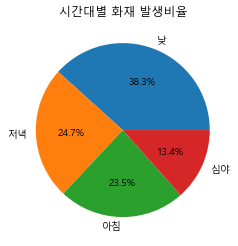

In [100]:
# 시간대별 화재발생 비교 그래프
x = f2017__3.index
y = f2017__3.values

plt.pie(y, labels=x, autopct='%.1f%%')
plt.title('시간대별 화재 발생비율')
plt.show()

In [101]:
# 화재유형별 화재발생 비교
f2017__4=fire2017.groupby('화재유형').count()['년'].sort_values(ascending=False)
f2017__4

화재유형
건축,구조물         27714
기타(쓰레기 화재등)     8115
자동차,철도차량        4971
임야              3267
선박,항공기            80
위험물,가스제조소등        31
Name: 년, dtype: int64

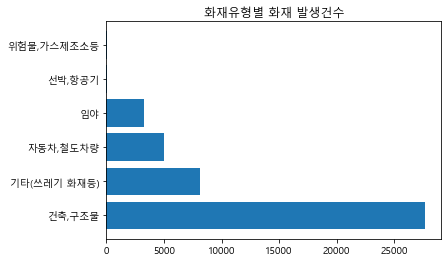

In [102]:
# 화재유형별 화재발생 비교 그래프
x = f2017__4.index
y = f2017__4.values

plt.barh(x,y)
plt.title('화재유형별 화재 발생건수')
plt.show()

In [103]:
# 발화열원별 화재발생 비교
f2017__5=fire2017.groupby('발화열원').count()['년'].sort_values(ascending=False)
f2017__5.head(3)

발화열원
작동기기         15988
담뱃불, 라이터불     9462
불꽃, 불티        9126
Name: 년, dtype: int64

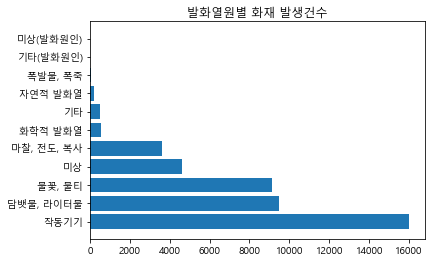

In [104]:
# 발화열원별 화재발생 비교 그래프
x = f2017__5.index
y = f2017__5.values

plt.barh(x,y)
plt.title('발화열원별 화재 발생건수')
plt.show()

In [105]:
# 발화요인별 화재발생 비교
f2017__6=fire2017.groupby('발화요인').count()['년'].sort_values(ascending=False)
f2017__6.head(3)

발화요인
부주의       23429
전기적 요인     9264
기계적 요인     4489
Name: 년, dtype: int64

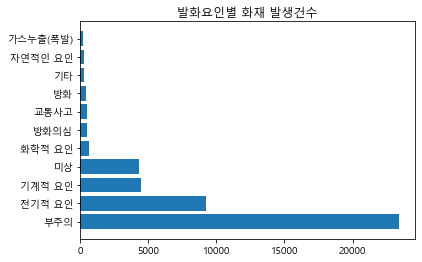

In [106]:
# 발화요인별 화재발생 비교 그래프
x = f2017__6.index
y = f2017__6.values

plt.barh(x,y)
plt.title('발화요인별 화재 발생건수')
plt.show()

In [107]:
# 최초착화물별 화재발생 비교
f2017__7=fire2017.groupby('최초착화물').count()['년'].sort_values(ascending=False)
f2017__7.head(3)

최초착화물
종이,목재,건초등    12282
전기,전자         8112
쓰레기류          5141
Name: 년, dtype: int64

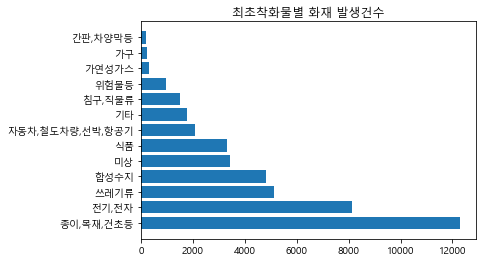

In [108]:
# 최초착화물별 화재발생 비교 그래프
x = f2017__7.index
y = f2017__7.values

plt.barh(x,y)
plt.title('최초착화물별 화재 발생건수')
plt.show()

In [109]:
# 장소별 화재발생 비교
f2017__8=fire2017.groupby('장소').count()['년'].sort_values(ascending=False)
f2017__8.head(3)

장소
주거      11765
기타       8115
산업시설     6151
Name: 년, dtype: int64

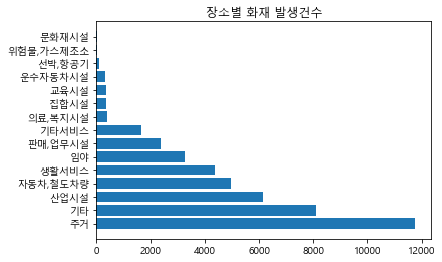

In [110]:
# 장소별 화재발생 비교 그래프
x = f2017__8.index
y = f2017__8.values

plt.barh(x,y)
plt.title('장소별 화재 발생건수')
plt.show()

#### ※ 2017년 화재발생 현황

In [111]:
# DF 객체를 행방향으로 연결
df=pd.concat([f2017__2.head(1), f2017__3.head(1), f2017__1.head(1), f2017__4.head(1), f2017__5.head(1),
             f2017__6.head(1), f2017__7.head(1), f2017__8.head(1)])

print(fire2017.columns[1:9])

# 시각화를 위해 DF 형태로 설정 후 행-열 전환
pd.DataFrame(df).T

Index(['월', '시간대', '시도', '화재유형', '발화열원', '발화요인', '최초착화물', '장소'], dtype='object')


,3월,낮,경기도,"건축,구조물",작동기기,부주의,"종이,목재,건초등",주거
년,5385,16926,9799,27714,15988,23429,12282,11765


In [112]:
f2017__2.head(1)

월
3월    5385
Name: 년, dtype: int64

In [113]:
# 수치형 자료의 기술통계 정보 보기
fire2017.describe().loc[['max','mean']][['사망','부상','인명피해']]

,사망,부상,인명피해
max,29.000000,40.000000,69.000000
mean,0.007809,0.041921,0.049731


### (3) 2017년 시도별 피해현황 비교 -----------------------

In [114]:
# 시도별 그룹화하여 합계를 출력
f2017_1=fire2017.groupby(['시도']).sum()
f2017_1

,사망,부상,인명피해,재산피해소계
시도,,,,
강원도,24,123,147,30228041
경기도,78,573,651,250321443
경상남도,24,86,110,30779725
경상북도,27,127,154,25092858
광주광역시,9,27,36,3375779
대구광역시,8,61,69,9278689
대전광역시,9,46,55,4931988
부산광역시,19,102,121,8301634
서울특별시,37,246,283,15323890


In [115]:
# 인명피해가 가장 큰 지역 -> 인명피해별 내림차순으로 정렬
f2017_3=f2017_1.sort_values('인명피해', ascending=False)
f2017_3.head(3)

,사망,부상,인명피해,재산피해소계
시도,,,,
경기도,78,573,651,250321443
서울특별시,37,246,283,15323890
경상북도,27,127,154,25092858


### (4) 화재발생빈도가 가장 큰 '경기도'를 상세분석 ----------------

In [116]:
# 시도 중 화재발생 빈도, 인명피해 합계, 재산피해 합계가 가장 큰 '경기도' 데이터 추출
fire2017_g = fire2017[fire2017['시도']=='경기도']
fire2017_g.head(3)

,년,월,시간대,시도,화재유형,발화열원,발화요인,최초착화물,장소,사망,부상,인명피해,재산피해소계
87851,2017,1월,심야,경기도,"건축,구조물",작동기기,부주의,식품,주거,0,0,0,1
87853,2017,1월,심야,경기도,"건축,구조물","담뱃불, 라이터불",부주의,쓰레기류,주거,0,0,0,3638
87855,2017,1월,심야,경기도,"건축,구조물","마찰, 전도, 복사",기계적 요인,위험물등,산업시설,0,0,0,5490


In [117]:
fire2017_g.shape

(9799, 13)

In [118]:
fire2017_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 87851 to 132007
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   년       9799 non-null   category
 1   월       9799 non-null   category
 2   시간대     9799 non-null   category
 3   시도      9799 non-null   category
 4   화재유형    9799 non-null   category
 5   발화열원    9799 non-null   category
 6   발화요인    9799 non-null   category
 7   최초착화물   9799 non-null   category
 8   장소      9799 non-null   category
 9   사망      9799 non-null   int64   
 10  부상      9799 non-null   int64   
 11  인명피해    9799 non-null   int64   
 12  재산피해소계  9799 non-null   int64   
dtypes: category(9), int64(4)
memory usage: 472.6 KB


In [119]:
# 인명피해가 있는 상황만 확인
fire17_1 = fire2017_g[fireDF.인명피해!=0]

# 재산피해가 있는 상황만 확인
fire17_2 = fire2017_g[fireDF.재산피해소계!=0]

C:\Users\whrjs\AppData\Local\Temp\ipykernel_14140\429012266.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fire17_1 = fire2017_g[fireDF.인명피해!=0]
C:\Users\whrjs\AppData\Local\Temp\ipykernel_14140\429012266.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fire17_2 = fire2017_g[fireDF.재산피해소계!=0]


In [120]:
# 화재유형별 발생빈도, 인명피해, 재산피해 산출
fire17_11=fire2017_g.groupby('화재유형')[['년']].count()
fire17_12=fire17_1.groupby('화재유형')[['인명피해']].mean()
fire17_13=fire17_2.groupby('화재유형')[['재산피해소계']].mean()

In [121]:
# DF 객체를 열방향으로 연결
df1=pd.concat([fire17_11,fire17_12,fire17_13], axis=1)
df1

,년,인명피해,재산피해소계
화재유형,,,
"건축,구조물",6178,1.604720,37754.049667
기타(쓰레기 화재등),1629,1.200000,3135.942455
"선박,항공기",0,NaN,NaN
"위험물,가스제조소등",10,1.500000,14976.200000
임야,813,1.000000,2937.471448
"자동차,철도차량",1169,1.205882,8964.366209


In [122]:
# 발화열원별 발생빈도, 인명피해, 재산피해 산출
fire17_21=fire2017_g.groupby('발화열원')[['년']].count()
fire17_22=fire17_1.groupby('발화열원')[['인명피해']].mean()
fire17_23=fire17_2.groupby('발화열원')[['재산피해소계']].mean()

df1=pd.concat([fire17_21,fire17_22,fire17_23], axis=1)
df1

,년,인명피해,재산피해소계
발화열원,,,
기타,79,4.000000,57496.589744
기타(발화원인),0,NaN,NaN
"담뱃불, 라이터불",2112,1.278481,6342.383488
"마찰, 전도, 복사",717,1.384615,11802.315126
미상,816,1.658228,139010.592089
미상(발화원인),0,NaN,NaN
"불꽃, 불티",1819,1.500000,15509.014164
자연적 발화열,58,1.000000,8871.189655
작동기기,4029,1.417808,19184.539035


In [123]:
# 발화요인별 발생빈도, 인명피해, 재산피해 산출
fire17_31=fire2017_g.groupby('발화요인')[['년']].count()
fire17_32=fire17_1.groupby('발화요인')[['인명피해']].mean()
fire17_33=fire17_2.groupby('발화요인')[['재산피해소계']].mean()

df1=pd.concat([fire17_31,fire17_32,fire17_33], axis=1)
df1

,년,인명피해,재산피해소계
발화요인,,,
가스누출(폭발),38,1.700000,9766.815789
교통사고,98,1.222222,14150.816327
기계적 요인,1365,1.764706,12909.676449
기타,31,7.750000,66100.866667
미상,760,1.567164,146701.385942
방화,71,1.769231,16480.295775
방화의심,90,1.200000,5543.842697
부주의,4716,1.381188,9787.991505
자연적인 요인,62,1.000000,18197.081967


In [124]:
# 최초착화물별 발생빈도, 인명피해, 재산피해 산출
fire17_41=fire2017_g.groupby('최초착화물')[['년']].count()
fire17_42=fire17_1.groupby('최초착화물')[['인명피해']].mean()
fire17_43=fire17_2.groupby('최초착화물')[['재산피해소계']].mean()

df1=pd.concat([fire17_41,fire17_42,fire17_43], axis=1)
df1

,년,인명피해,재산피해소계
최초착화물,,,
가구,45,1.000000,78628.466667
가연성가스,69,3.444444,77728.884058
"간판,차양막등",43,1.500000,7007.523810
기타,369,2.409091,20502.425000
미상,676,1.476190,159931.988131
식품,528,1.142857,2405.009524
쓰레기류,1116,2.030303,19612.238313
위험물등,248,1.214286,40584.763265
"자동차,철도차량,선박,항공기",457,1.222222,8773.155702


In [125]:
# 장소별 발생빈도, 인명피해, 재산피해 산출
fire17_51=fire2017_g.groupby('장소')[['년']].count()
fire17_52=fire17_1.groupby('장소')[['인명피해']].mean()
fire17_53=fire17_2.groupby('장소')[['재산피해소계']].mean()

df1=pd.concat([fire17_51,fire17_52,fire17_53], axis=1)
df1

,년,인명피해,재산피해소계
장소,,,
교육시설,88,1.666667,27223.000000
기타,1629,1.200000,3135.942455
기타서비스,305,1.000000,5256.891803
문화재시설,1,NaN,78422.000000
산업시설,1891,1.768116,92866.909910
생활서비스,863,1.358974,11249.440324
"선박,항공기",0,NaN,NaN
운수자동차시설,77,1.000000,30356.298701
"위험물,가스제조소",10,1.500000,14976.200000


In [127]:
# 시간대별 발생빈도, 인명피해, 재산피해 산출
fire17_71=fire2017_g.groupby('시간대')[['년']].count()
fire17_72=fire17_1.groupby('시간대')[['인명피해']].mean()
fire17_73=fire17_2.groupby('시간대')[['재산피해소계']].mean()

df1=pd.concat([fire17_71,fire17_72,fire17_73], axis=1)
df1

,년,인명피해,재산피해소계
시간대,,,
낮,3801,1.470588,18609.726248
심야,1373,1.820513,50276.225476
아침,2305,1.435185,24029.745927
저녁,2320,1.372340,25199.793103
